# Trabalho Prático - Projeto e Análise de Algoritmos

## Processando os dados gerados pela execução do programa

Instalando requisitos

In [8]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importando requisitos

In [18]:
import pandas
import matplotlib
import matplotlib.pyplot
import seaborn

Importando dados

In [66]:
dados = pandas.read_csv('dados_v0.0.4_242_20240608221041.csv')

Gerando gráficos

In [67]:
dados_media_algoritmo_distancia_minima_por_tempo_execucao = {}
for index, row in dados.iterrows():
    if not (row['Algoritmo'], row['Distância Mínima']) in dados_media_algoritmo_distancia_minima_por_tempo_execucao:
        dados_media_algoritmo_distancia_minima_por_tempo_execucao[(row['Algoritmo'], row['Distância Mínima'])] = []
    else:
        dados_media_algoritmo_distancia_minima_por_tempo_execucao[(row['Algoritmo'], row['Distância Mínima'])].append(int(row['Tempo de Execução']))
for key in dados_media_algoritmo_distancia_minima_por_tempo_execucao:
    tamanho_item_key = len(dados_media_algoritmo_distancia_minima_por_tempo_execucao[key])
    dados_media_algoritmo_distancia_minima_por_tempo_execucao[key] = sum(dados_media_algoritmo_distancia_minima_por_tempo_execucao[key]) / tamanho_item_key

dados_grafico_algoritmo_tempo_execucao_distancia_minima = {
    'Algoritmo': [],
    'Distância Mínima': [],
    'Tempo de Execução': []
}

for (algoritmo, distancia_minima), tempo_execucao in dados_media_algoritmo_distancia_minima_por_tempo_execucao.items():
    dados_grafico_algoritmo_tempo_execucao_distancia_minima['Algoritmo'].append(algoritmo)
    dados_grafico_algoritmo_tempo_execucao_distancia_minima['Distância Mínima'].append(distancia_minima)
    dados_grafico_algoritmo_tempo_execucao_distancia_minima['Tempo de Execução'].append(tempo_execucao)
    

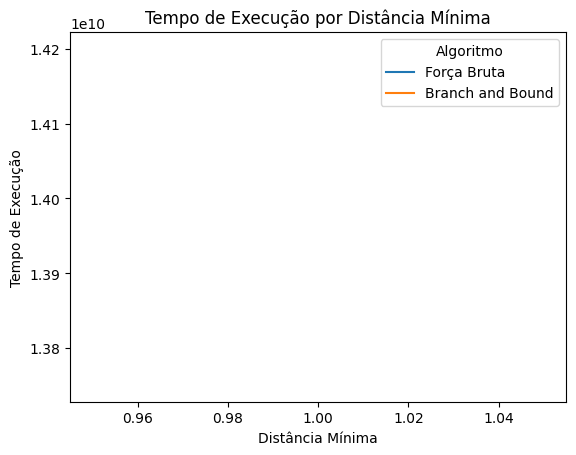

In [68]:
matplotlib.pyplot.figure()
seaborn.lineplot(x="Distância Mínima", y="Tempo de Execução", hue="Algoritmo", data=dados_grafico_algoritmo_tempo_execucao_distancia_minima, style='Algoritmo', dashes=False)
matplotlib.pyplot.title('Tempo de Execução por Distância Mínima')
matplotlib.pyplot.xlabel('Distância Mínima')
matplotlib.pyplot.ylabel('Tempo de Execução')
matplotlib.pyplot.legend(title='Algoritmo')

matplotlib.pyplot.show()

Média dos algoritmos de acordo com os nossos testes

In [69]:
media_algoritmos = {
    'Força Bruta': [],
    'Branch and Bound': []
}

for index, row in dados.iterrows():
    if row['Algoritmo'] == 'Força Bruta':
        media_algoritmos['Força Bruta'].append(int(row['Tempo de Execução']))
    else:
        media_algoritmos['Branch and Bound'].append(int(row['Tempo de Execução']))

tamanho_media_forca_bruta = len(media_algoritmos['Força Bruta'])
media_algoritmos['Força Bruta'] = sum(media_algoritmos['Força Bruta']) / tamanho_media_forca_bruta
tamanho_media_branch_and_bound = len(media_algoritmos['Branch and Bound'])
media_algoritmos['Branch and Bound'] = sum(media_algoritmos['Branch and Bound']) / tamanho_media_branch_and_bound

In [70]:
media_algoritmos

{'Força Bruta': 14083372313.196722, 'Branch and Bound': 13637566631.07438}

<BarContainer object of 2 artists>

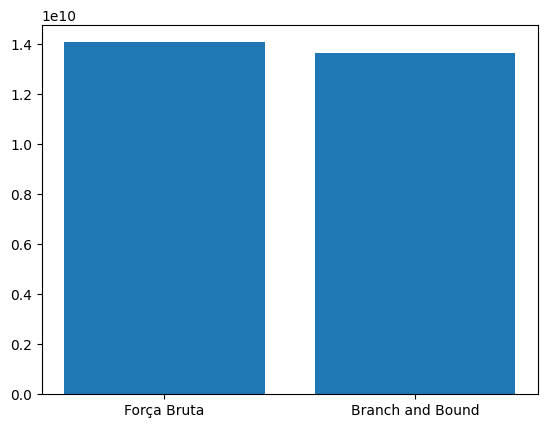

In [71]:
matplotlib.pyplot.figure()
matplotlib.pyplot.bar(media_algoritmos.keys(), media_algoritmos.values())

In [72]:
dados_grafico_numero_lojas = {}

for index, row in dados.iterrows():
    try:
        numero_total_lojas = int(row['Número de Franquias']) * int(row['Número de Lojas por franquia'])
        if not (row['Algoritmo'], numero_total_lojas) in dados_grafico_numero_lojas:
            dados_grafico_numero_lojas[(row['Algoritmo'], numero_total_lojas)] = []
        else:
            dados_grafico_numero_lojas[(row['Algoritmo'], numero_total_lojas)].append(int(row['Tempo de Execução']))
    except:
        pass

for key in dados_grafico_numero_lojas:
    tamanho_item_key = len(dados_grafico_numero_lojas[key])
    dados_grafico_numero_lojas[key] = sum(dados_grafico_numero_lojas[key]) / tamanho_item_key

dados_grafico_numero_lojas_ = {
    'Algoritmo': [],
    'Número total de lojas': [],
    'Tempo de Execução': []
}

for (algoritmo, numero_total_lojas), tempo_execucao in dados_grafico_numero_lojas.items():
    dados_grafico_numero_lojas_['Algoritmo'].append(algoritmo)
    dados_grafico_numero_lojas_['Número total de lojas'].append(numero_total_lojas)
    dados_grafico_numero_lojas_['Tempo de Execução'].append(tempo_execucao)

dados_grafico_numero_lojas = dados_grafico_numero_lojas_

/tmp/ipykernel_29461/1804796199.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='Algoritmo')


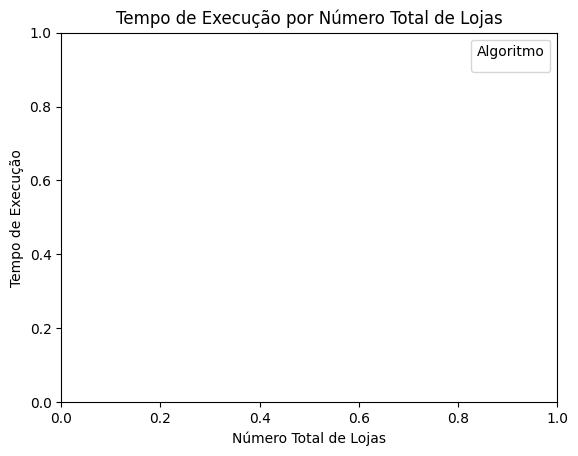

In [73]:
matplotlib.pyplot.figure()
seaborn.lineplot(x="Número total de lojas", y="Tempo de Execução", hue="Algoritmo", data=dados_grafico_numero_lojas, style='Algoritmo', dashes=False)
matplotlib.pyplot.title('Tempo de Execução por Número Total de Lojas')
matplotlib.pyplot.xlabel('Número Total de Lojas')
matplotlib.pyplot.ylabel('Tempo de Execução')
matplotlib.pyplot.legend(title='Algoritmo')
matplotlib.pyplot.show()

In [74]:
dados

,Número de Franquias,Número de Cidades,Distância Mínima,Algoritmo,Tempo de Execução,Arquivo de Dados
0,2,4,1,Força Bruta,12975989,04_cidades.txt
1,2,4,1,Branch and Bound,19602455,04_cidades.txt
2,2,4,1,Força Bruta,23704332,04_cidades.txt
3,2,4,1,Branch and Bound,13378852,04_cidades.txt
4,2,4,1,Força Bruta,17054702,04_cidades.txt
...,...,...,...,...,...,...
238,2,15,1,Força Bruta,74558651992,15_cidades.txt
239,2,15,1,Branch and Bound,73709672893,15_cidades.txt
240,2,16,1,Força Bruta,238243021267,16_cidades.txt
241,2,16,1,Branch and Bound,291215946748,16_cidades.txt


In [75]:
dados[dados['Distância Mínima'] == 1]

,Número de Franquias,Número de Cidades,Distância Mínima,Algoritmo,Tempo de Execução,Arquivo de Dados
0,2,4,1,Força Bruta,12975989,04_cidades.txt
1,2,4,1,Branch and Bound,19602455,04_cidades.txt
2,2,4,1,Força Bruta,23704332,04_cidades.txt
3,2,4,1,Branch and Bound,13378852,04_cidades.txt
4,2,4,1,Força Bruta,17054702,04_cidades.txt
...,...,...,...,...,...,...
238,2,15,1,Força Bruta,74558651992,15_cidades.txt
239,2,15,1,Branch and Bound,73709672893,15_cidades.txt
240,2,16,1,Força Bruta,238243021267,16_cidades.txt
241,2,16,1,Branch and Bound,291215946748,16_cidades.txt


Média dos algoritmos de acordo com o teste do professor

In [76]:
media_algoritmos = {
    'Força Bruta': [],
    'Branch and Bound': []
}

for index, row in dados[dados['Distância Mínima'] == 1].iterrows():
    if row['Algoritmo'] == 'Força Bruta':
        media_algoritmos['Força Bruta'].append(int(row['Tempo de Execução']))
    else:
        media_algoritmos['Branch and Bound'].append(int(row['Tempo de Execução']))

tamanho_media_forca_bruta = len(media_algoritmos['Força Bruta'])
media_algoritmos['Força Bruta'] = sum(media_algoritmos['Força Bruta']) / tamanho_media_forca_bruta
tamanho_media_branch_and_bound = len(media_algoritmos['Branch and Bound'])
media_algoritmos['Branch and Bound'] = sum(media_algoritmos['Branch and Bound']) / tamanho_media_branch_and_bound

In [77]:
media_algoritmos

{'Força Bruta': 14083372313.196722, 'Branch and Bound': 13637566631.07438}

<BarContainer object of 2 artists>

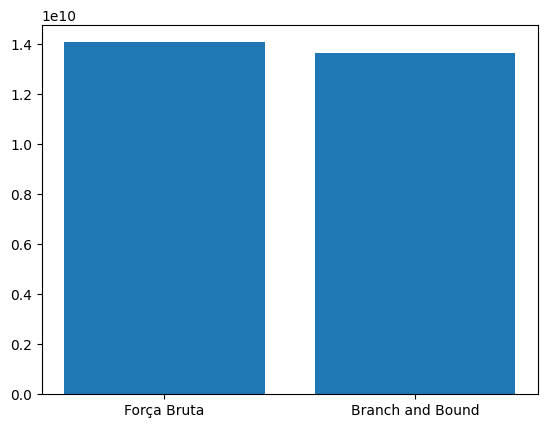

In [78]:
matplotlib.pyplot.figure()
matplotlib.pyplot.bar(media_algoritmos.keys(), media_algoritmos.values())